## KoNLPy 한국어 처리 패키지
- KoNLPy는 한국어 정보처리를 위한 파이썬 패키지이다 

[ 한국어 토큰화 어려움 ]
1. 교착어의 특성 : 조사가 존재해 띄어쓰기만으로 토큰화 안되고 조사를 전부 분리해줘야함. 형태소 이해
    - '사과가 건강에 좋다고 하더라구, 사과에 비타민이 많다잖아. 그래서 사과를 사러 근처 슈퍼에 갔더니 사과 가격이 글쎄 3개에 5천원이라고해서 사지 않았어.
    - 사과가, 사과에, 사과를, 사과 가 전부 다른 단어로 간주
2. 한국어 띄어쓰기가 잘 지켜지지 않음
    - 제가이렇게띄어쓰기를전혀하지않고글을썼다고하더라도글을쉽게이해할수있습니다.
    -tobeornottobethatisthequestion

3. 한자어라는 특성상 하나의 음절조차도 다른 의미를 가질 수 있음
4. 한국어는 어순이 그렇게 중요하지 않음
5. 주어가 손쉽게 생략됨
    - 나는운동을했어.체육관에서
    - 나는 체육관에서 운동을 했어
    - (나는) 체육관에서 운동했어
6. 데이터와 언어에 특화된 모델이 영어에 비해 부족함

In [2]:
#pip install konlpy

     ---------------------------------------- 19.4/19.4 MB 4.9 MB/s eta 0:00:00
     -------------------------------------- 345.1/345.1 kB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import konlpy
konlpy.__version__

'0.6.0'

## 1. 한국어 말뭉치 가져오기

- KoNLPy에서는 대한민국 헌법 말뭉치인 `kolaw`와 국회법안 말뭉치인 `kobill`을 제공한다.
- 각 말뭉치가 포함하는 파일의 이름은 `fields` 메서드로 알 수 있고 `open` 메서드로 해당 파일의 텍스트를 읽어들인다.

In [2]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [3]:
c = kolaw.open('constitution.txt').read()
print(c[:100])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


In [4]:
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [5]:
d = kobill.open('1809890.txt').read()
print(d[:100])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이


## 2. 토큰화
- 문장 토큰화 : KKS 추천

In [11]:
# 박상길님이 개발한 KSS(Korean Sentence Splitter) - Setence tokenizer 로 성능 좋음
#!pip install kss 

     ---------------------------------------- 79.1/79.1 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 131.3/131.3 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 24.3/24.3 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 324.5/324.5 kB 4.0 MB/s eta 0:00:00
  Created wheel for kss: filename=kss-4.5.4-py3-none-any.whl size=54785 sha256=28551323f4e94b7b4838227ee0afe8a45b8ad753cacf003cc8fffb0a90a92470
  Stored in directory: c:\users\biz\appdata\local\pip\cache\wheels\30\a3\4e\13cd95768db108c750460c9ab9ff2cce79ee83647f5e9b14f5
  Created wheel for pecab: filename=pecab-1.0.8-py3-none-any.whl size=26646701 sha256=3a7df9e7ef255e638105da0efa21ea5916e0cfa

In [6]:
import kss
kss.split_sentences(d)

[Kss]: Because there's no supported C++ morpheme analyzer, Kss will take pecab as a backend. :D
For your information, Kss also supports mecab backend.
We recommend you to install mecab or konlpy.tag.Mecab for faster execution of Kss.
Please refer to following web sites for details:
- mecab: https://cleancode-ws.tistory.com/97
- konlpy.tag.Mecab: https://uwgdqo.tistory.com/363

c:\Users\cooju\anaconda3\envs\crawl_env\lib\site-packages\pecab\_tokenizer.py:274: RuntimeWarning: overflow encountered in scalar add
  least_cost += word_cost
c:\Users\cooju\anaconda3\envs\crawl_env\lib\site-packages\pecab\_tokenizer.py:265: RuntimeWarning: overflow encountered in scalar add
  from_pos_data.costs[idx]


['지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.',
 '따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).',
 '- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.',
 '제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.',
 '부      칙\n\n이 법은 공포한 날부터 시행한다.',
 '- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다.',
 '다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n-------------------

In [7]:
text = '사과가 건강에 좋다고 하더라구, 사과에 비타민이 많다잖아~. 그래서 사과를 사러 근처 슈퍼에 갔더니 사과 가격이 글쎄 3개에 5천원이라고해서 사지 않았어!'
kss.split_sentences(text)

['사과가 건강에 좋다고 하더라구, 사과에 비타민이 많다잖아~.',
 '그래서 사과를 사러 근처 슈퍼에 갔더니 사과 가격이 글쎄 3개에 5천원이라고해서 사지 않았어!']

## 3. 형태소 분석

- 형태소(morpheme) : 언어학에서 일정한 의미가 있는 가장 작은 말의 단위
- 자연어 처리에서는 토큰으로 형태소를 이용
1) 자립 형태소
    - 접속, 어미, 조사와 상관없이 자립하여 사용할 수 있는 형태소
    - 그 자체로 단어가 되는 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 독립언(감탄사) 등
2) 의존 형태소
    - 다른 형태소와 결합하여 사용되는 형태소
    - 관계언(조사), 접사, 어간, 어미를 말함, 동사와 형용사는 어간과 어미의 결합으로 구성
  
3) 예) 문장 - 에디가 책을 읽었다.                         
    * 자립 형태소 : 에디, 책
    * 의존 형태소 : -가, -을, 읽-, -었, -다

### * KoNLPy 의 다양한 형태소 분석, 태깅 파이썬 라이브러리 

* Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.
  * http://semanticweb.kaist.ac.kr/hannanum/
* Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
  * http://kkma.snu.ac.kr/
* Komoran: 코모란. Shineware에서 개발. 오탈자에 강함
  * https://github.com/shin285/KOMORAN
* Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.(windows에서 지원 안함). 연산 속도가 빠르고 분석 성능도 준수하여 선호도가 높음
  * https://bitbucket.org/eunjeon/mecab-ko
* Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
  * https://github.com/open-korean-text/open-korean-text
* Khaii 는 가장 퇴근에 나온 분석기로 딥러닝 기반 형태소 분석기
* Soynlp는 학습 기반으로 복합 명사를 잘 추출해낼 수 있음

### * 한국어 형태소 분석기를 사용하려면 
- 속도빠른 Mecab 또는 OKT 추천

In [ ]:
# Winodw - mecab
#!pip install --user eunjeon

In [9]:
# 다양한 형태소 분석, 태깅 라이브러리
from konlpy.tag import *
from eunjeon import Mecab

hannanum = Hannanum()   # 한나눔
okt = Okt()             # 오픈코리안텍스트
kkma = Kkma()           # 꼬꼬마
komoran = Komoran()     # 코모란. Shineware에서 개발. 
mecab = Mecab()         # 메캅

이 클래스들은 다음과 같은 메서드를 공통적으로 제공한다.

* `nouns` : 명사 추출
* `morphs` : 형태소 추출
* `pos` : 품사 태깅

### 3.1 명사 추출
- 문자열에서 명사만 추출하려면 `noun` 명령을 사용한다.

In [10]:
hannanum.nouns(c[:40])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']

In [11]:
kkma.nouns(c[:40])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동']

In [12]:
# komoran은 빈줄이 있으면 에러가 남
komoran.nouns("\n".join([s for s in c[:40].split("\n") if s]))

['대한민국', '헌법', '역사', '전통', '국민', '운동']

In [13]:
okt.nouns(c[:40])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']

🏛️ Hannanum (한나눔)
- 특징: 복합명사를 통째로 보존
- 장점: '대한민국헌법', '3·1운동' 하나로 인식
- 단점: 느리고 세밀한 분석 어려움
- 추천: 전문 문서, 학술 텍스트

🔬 Kkma (꼬꼬마)
- 특징: 가장 세밀하고 정확한 분석
- 장점: '대한', '대한민국', '대한민국헌법' 모두 추출
- 단점: 매우 느리고 과도한 분석
- 추천: 언어학 연구, 정밀 분석

🚀 Komoran (코모란)
- 특징: 실용적이고 신조어에 강함
- 장점: 빠르고 적절한 수준의 분석
- 단점: 일부 고유명사 누락 ('유구', '빛' 없음)
- 추천: 소셜미디어, 실시간 처리

⚡ Okt (오픈 코리안 텍스트)
- 특징: 사용하기 쉽고 빠름
- 장점: 초보자 친화적, 안정적
- 단점: 상대적으로 낮은 정확도
- 추천: 교육용, 프로토타입

📈 성능 비교표
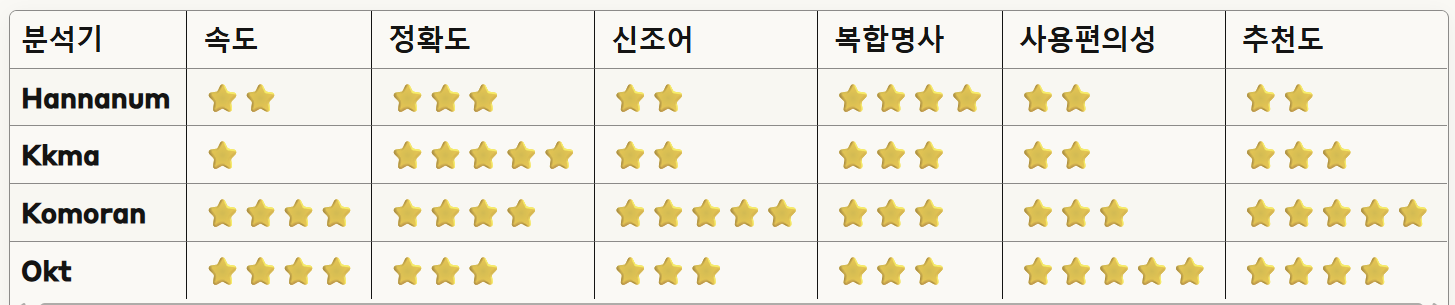

In [17]:
print(f"hannanum : {hannanum.nouns(c[:40])}")
print(f"kkma     : {kkma.nouns(c[:40])}")
print( 'komoran  :',komoran.nouns("\n".join([s for s in c[:40].split("\n") if s])))
#print('komoran: {}'.format(komoran.nouns("\n".join([s for s in c[:40].split("\n") if s]))))
print(f"okt      : {okt.nouns(c[:40])}")

hannanum : ['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']
kkma     : ['대한', '대한민국', '대한민국헌법', '민국', '헌법', '유구', '역사', '전통', '우리', '국민', '3', '1', '1운동', '운동']
komoran  : ['대한민국', '헌법', '역사', '전통', '국민', '운동']
okt      : ['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']


### 3.2 형태소 추출
- 명사 뿐 아니라 모든 품사의 형태소를 알아내려면 `morphs`라는 명령을 사용한다.

In [18]:
hannanum.morphs(c[:40])

['대한민국헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛',
 '나는',
 '우리',
 '대한국민',
 '은',
 '3·1운동',
 '으로']

In [19]:
kkma.morphs(c[:40])

['대한민국',
 '헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛나',
 '는',
 '우리',
 '대하',
 'ㄴ',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [20]:
# komoran은 빈줄이 있으면 에러가 남
komoran.morphs("\n".join([s for s in c[:40].split("\n") if s]))

['대한민국',
 '헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛나',
 '는',
 '우리',
 '대하',
 'ㄴ',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [21]:
okt.morphs(c[:40])

['대한민국',
 '헌법',
 '\n\n',
 '유구',
 '한',
 '역사',
 '와',
 '전통',
 '에',
 '빛나는',
 '우리',
 '대',
 '한',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [22]:
print(f"hannanum : {hannanum.morphs(c[:40])}")
print(f"kkma     : {kkma.morphs(c[:40])}")
print('komoran  :',komoran.morphs("\n".join([s for s in c[:40].split("\n") if s])))
print(f"okt      : {okt.morphs(c[:40])}")

hannanum : ['대한민국헌법', '유구', '하', 'ㄴ', '역사', '와', '전통', '에', '빛', '나는', '우리', '대한국민', '은', '3·1운동', '으로']
kkma     : ['대한민국', '헌법', '유구', '하', 'ㄴ', '역사', '와', '전통', '에', '빛나', '는', '우리', '대하', 'ㄴ', '국민', '은', '3', '·', '1', '운동', '으로']
komoran  : ['대한민국', '헌법', '유구', '하', 'ㄴ', '역사', '와', '전통', '에', '빛나', '는', '우리', '대하', 'ㄴ', '국민', '은', '3', '·', '1', '운동', '으로']
okt      : ['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로']


### 3.3 품사(POS, part-of-speech) 태깅
- `pos` 명령을 사용하면 품사 부착을 한다. 

- 한국어 품사 태그세트로는 "21세기 세종계획 품사 태그세트"를 비롯하여 다양한 품사 태그세트가 있다. 형태소 분석기마다 사용하는 품사 태그가 다르므로 각 형태소 분석기에 대한 문서를 참조한다.

In [23]:
hannanum.pos(c[:40])

[('대한민국헌법', 'N'),
 ('유구', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('역사', 'N'),
 ('와', 'J'),
 ('전통', 'N'),
 ('에', 'J'),
 ('빛', 'N'),
 ('나는', 'J'),
 ('우리', 'N'),
 ('대한국민', 'N'),
 ('은', 'J'),
 ('3·1운동', 'N'),
 ('으로', 'J')]

In [24]:
kkma.pos(c[:40])

[('대한민국', 'NNG'),
 ('헌법', 'NNG'),
 ('유구', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKM'),
 ('빛나', 'VV'),
 ('는', 'ETD'),
 ('우리', 'NNM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD'),
 ('국민', 'NNG'),
 ('은', 'JX'),
 ('3', 'NR'),
 ('·', 'SP'),
 ('1', 'NR'),
 ('운동', 'NNG'),
 ('으로', 'JKM')]

In [25]:
# komoran은 빈줄이 있으면 에러가 남
komoran.pos("\n".join([s for s in c[:40].split("\n") if s]))

[('대한민국', 'NNP'),
 ('헌법', 'NNP'),
 ('유구', 'XR'),
 ('하', 'XSA'),
 ('ㄴ', 'ETM'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKB'),
 ('빛나', 'VV'),
 ('는', 'ETM'),
 ('우리', 'NP'),
 ('대하', 'VV'),
 ('ㄴ', 'ETM'),
 ('국민', 'NNP'),
 ('은', 'JX'),
 ('3', 'SN'),
 ('·', 'SP'),
 ('1', 'SN'),
 ('운동', 'NNP'),
 ('으로', 'JKB')]

In [26]:
okt.pos(c[:40])

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('·', 'Punctuation'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa')]

- 부착되는 품사 태그의 기호와 의미는 `tagset` 속성으로 확인할 수 있다.

In [27]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [28]:
import pandas as pd
tagsets = pd.DataFrame()
N = 67
tagsets["Hannanum-기호"] = list(hannanum.tagset.keys()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Hannanum-품사"] = list(hannanum.tagset.values()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Kkma-기호"] = list(kkma.tagset.keys()) + list("*" * (N - len(kkma.tagset)))
tagsets["Kkma-품사"] = list(kkma.tagset.values()) + list("*" * (N - len(kkma.tagset)))
tagsets["Komoran-기호"] = list(komoran.tagset.keys()) + list("*" * (N - len(komoran.tagset)))
tagsets["Komoran-품사"] = list(komoran.tagset.values()) + list("*" * (N - len(komoran.tagset)))
tagsets["OKT-기호"] = list(okt.tagset.keys()) + list("*" * (N - len(okt.tagset)))
tagsets["OKT-품사"] = list(okt.tagset.values()) + list("*" * (N - len(okt.tagset)))
tagsets

,Hannanum-기호,Hannanum-품사,Kkma-기호,Kkma-품사,Komoran-기호,Komoran-품사,OKT-기호,OKT-품사
0,E,어미,EC,연결 어미,EC,연결 어미,Adjective,형용사
1,EC,연결 어미,ECD,의존적 연결 어미,EF,종결 어미,Adverb,부사
2,EF,종결 어미,ECE,대등 연결 어미,EP,선어말어미,Alpha,알파벳
3,EP,선어말어미,ECS,보조적 연결 어미,ETM,관형형 전성 어미,Conjunction,접속사
4,ET,전성 어미,EF,종결 어미,ETN,명사형 전성 어미,Determiner,관형사
...,...,...,...,...,...,...,...,...
62,*,*,XPV,용언 접두사,*,*,*,*
63,*,*,XR,어근,*,*,*,*
64,*,*,XSA,형용사 파생 접미사,*,*,*,*
65,*,*,XSN,명사파생 접미사,*,*,*,*


- 각 단어(토큰)의 사용 빈도    
koNLPy의 형태소 분석기와 NLTK의 Text 클래스를 결합하여 NLTK 기능을 사용할 수도 있다.

In [30]:
! pip install koreanize-matplotlib

  Using cached koreanize_matplotlib-0.1.1-py3-none-any.whl.metadata (992 bytes)
Using cached koreanize_matplotlib-0.1.1-py3-none-any.whl (7.9 MB)


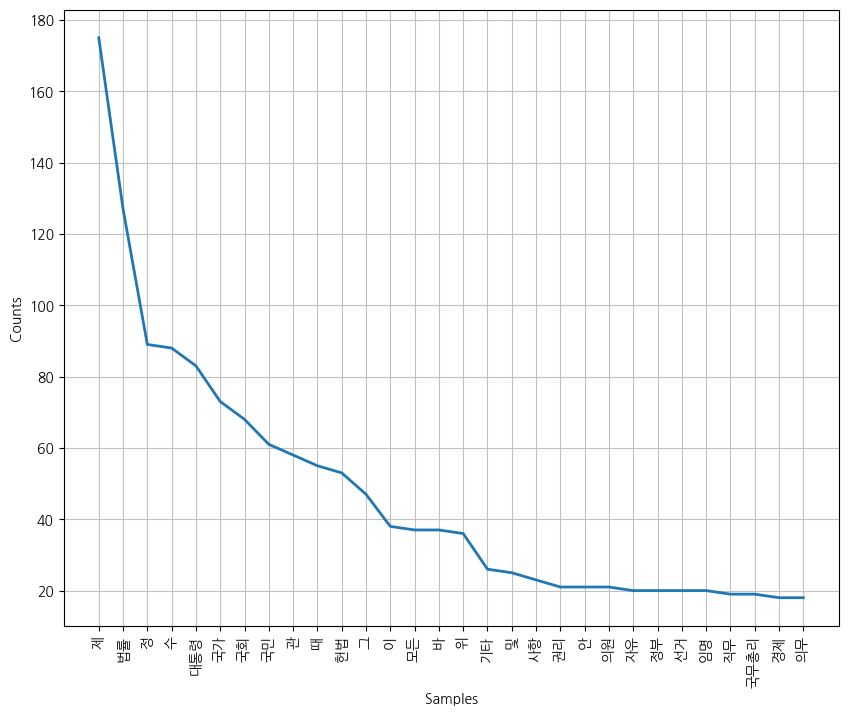

In [31]:
from nltk import Text
from matplotlib import pyplot as plt
import koreanize_matplotlib
#from matplotlib import font_manager, rc

plt.figure(figsize=(10,8))
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# rc('font', family=font_name)

kolaw = Text(okt.nouns(c), name="kolaw")
kolaw.plot(30)
plt.show()

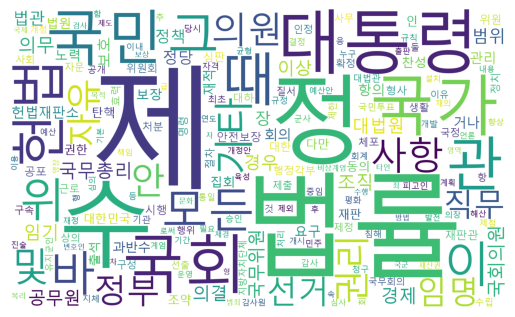

In [56]:
#! pip install wordcloud
from wordcloud import WordCloud

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
#font_path = r'c:/Windows/Fonts/malgun.ttf'

wc = WordCloud(width = 1500, height = 900, background_color="white", font_path=r'c:/Windows/Fonts/malgun.ttf')
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()

In [ ]:
# Mac 한글 폰트설정
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## 4. 불용어(stopword)
- 직접 불용어를 정의해보고, 주어진 문장으로부터 사용자가 정의한 불용어 사전으로부터 불용어를 제거
- 한국어 불용어 리스트 https://www.ranks.nl/stopwords/korean

In [20]:
from konlpy.tag import Okt

okt = Okt()

sentence = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(sentence)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)

불용어 제거 전 : ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지', '.']
불용어 제거 후 : ['고기', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨대', '삼겹살', '을', '중요한', '있지', '.']
